# Text Classification on given Dataset

Given the Emotions_training.csv dataset, we have to perform Text Classification. 
Task 1: Data Preprocessing.
Task 2: Build Multiple models (at least 3 models as per mentor's requirement) 
Task 3: Comparing those models.


Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text.

How Does Text Classification Work?

You can perform text classification in two ways:manual or automatic.

Manual text classification involves a human annotator, who interprets the content of text and categorizes it accordingly. This method can deliver good results but it’s time-consuming and expensive.

Automatic text classification applies machine learning, natural language processing (NLP), and other AI-guided techniques to automatically classify text in a faster, more cost-effective, and more accurate manner.

Machine Learning Text Classification Algorithms:

1. Naive Bayes family of algorithms
2. support vector machines (SVM)


##  Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [27]:
df = pd.read_csv('Emotions_training.csv')

In [28]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [30]:
df.isnull().sum()

text     0
label    0
dtype: int64

###  1. Data Preprocessing

####  Lower Case

In [31]:
df['text'] = df['text'].str.lower()

#### Remove Links

In [32]:
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

C:\Users\sansk\AppData\Local\Temp\ipykernel_23068\2808825825.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')


In [33]:
df['text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

#### Remove next lines

In [34]:
df['text'] = df['text'].str.replace('\n',' ')

#### Remove Words containing numbers

In [35]:
df['text'] = df['text'].str.replace('\d+','') 

C:\Users\sansk\AppData\Local\Temp\ipykernel_23068\1176194866.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+','')


#### Extra spaces

In [36]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

#### Special Characters

In [37]:
def remove_specialchar(line):
   return re.sub(r'[^\w\s]','',line) 
df['text'] = df['text'].apply(remove_specialchar)

#### Removal of stop words

In [40]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    tokens = word_tokenize(sentence)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
    
df['text'] = df['text'].apply(remove_stopwords)

#### Stemming

In [46]:
stemmer = PorterStemmer()

def stemming(words):
    tokens = word_tokenize(words)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stemming)

#### Lemmatization

In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sansk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['text'] = df['text'].apply(lemmatization)

### Focusing on 2nd Column: Label

In [50]:
df['label'].unique() # Checking unique labels

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [54]:
df['label'].value_counts() # Counting no. of times each label came

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

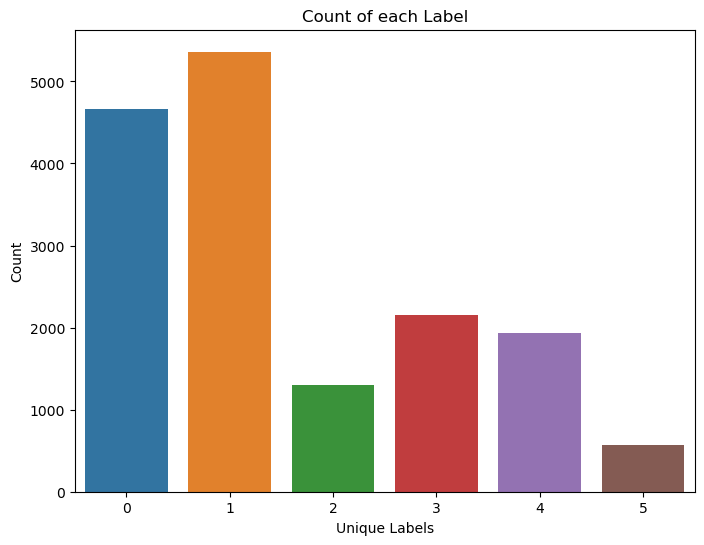

In [69]:
# Create barplot which will represent each label's value_counts()
plt.figure(figsize = (8,6))
sns.countplot(x = 'label', data = df)
plt.xlabel('Unique Labels')
plt.ylabel('Count')
plt.title('Count of each Label')
plt.show()